# 1. Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

# 2. Visualization

This images comes under this class number :  [7]


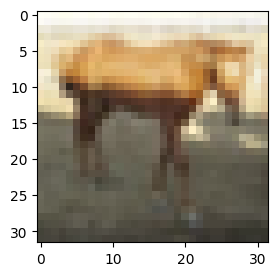

In [ ]:
plt.figure(figsize = (4,3))
i = 2000
plt.imshow(X_train[i])
print('This images comes under this class number : ', y_train[i])

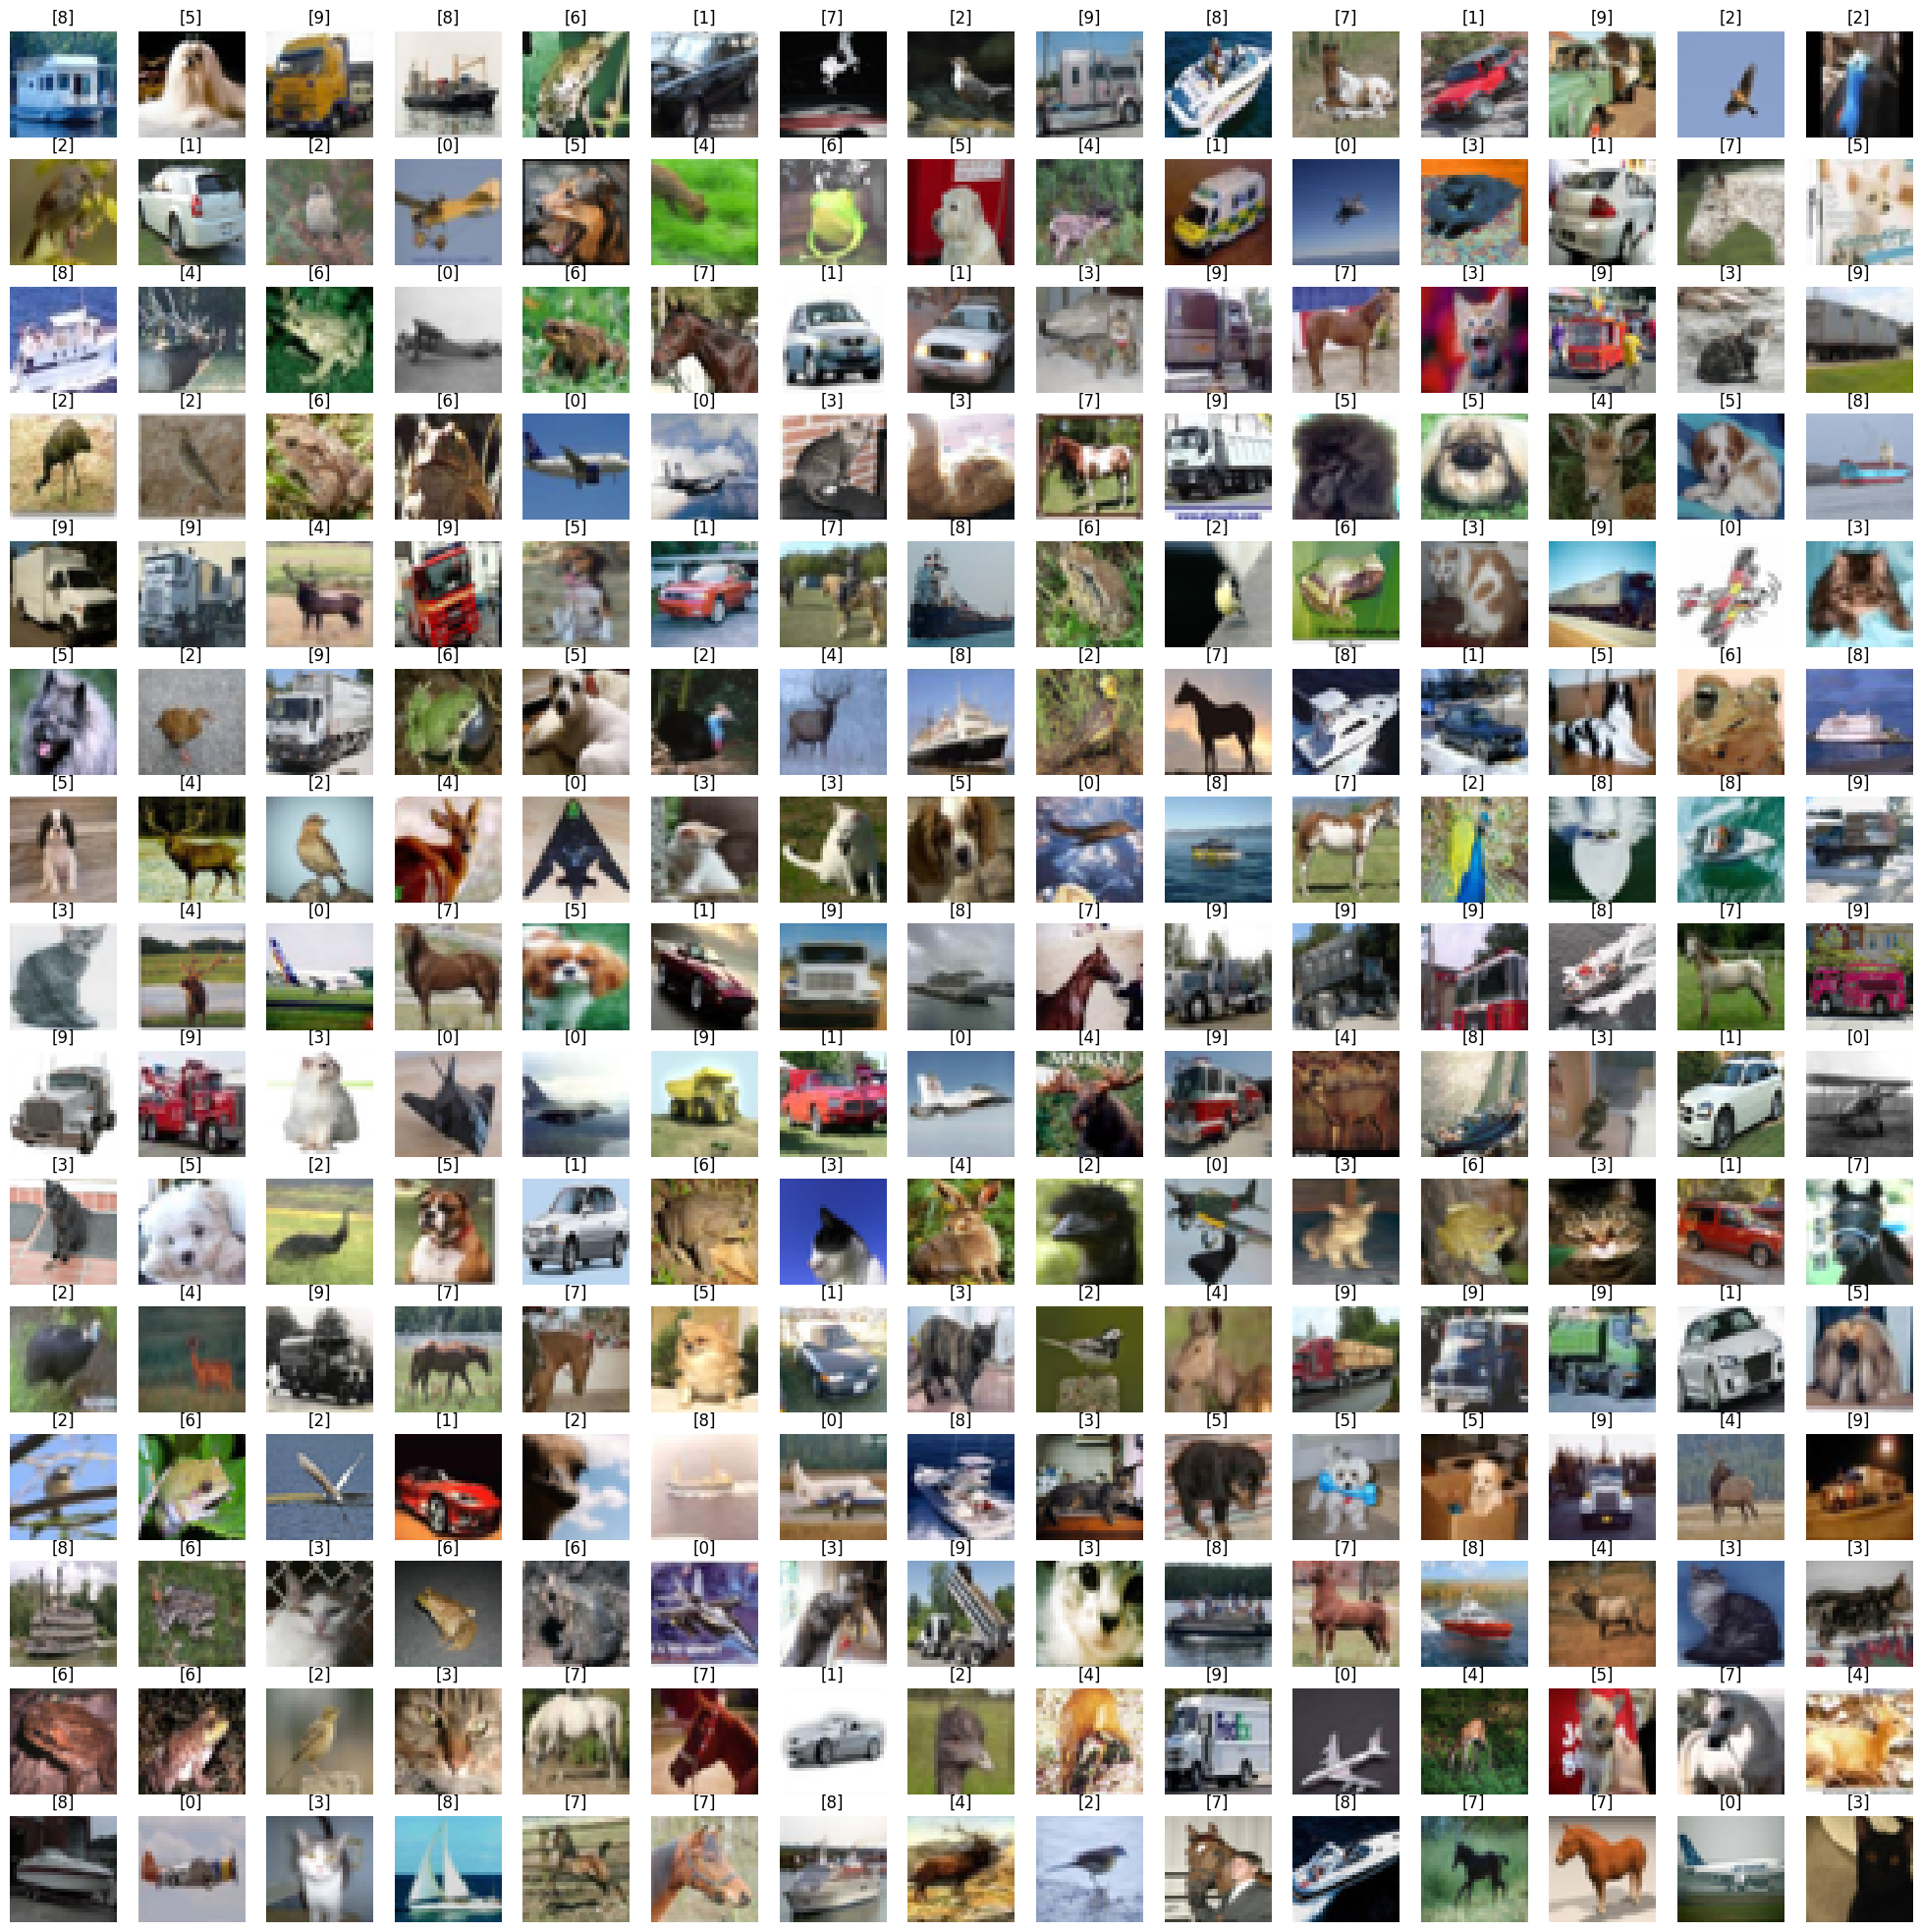

In [ ]:
w_grid = 15
l_grid = 15

fig , axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

# 3. Data Preparation

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
n_cat = 10 # number of categories
y_train = keras.utils.to_categorical(y_train,n_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
n_cat = 10 # number of categories
y_test = keras.utils.to_categorical(y_test,n_cat)

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
inp_shape = X_train.shape[1:]
inp_shape

(32, 32, 3)

# 4. Training Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model  = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size = (3,3), activation = 'relu', input_shape = inp_shape ))
cnn_model.add(Conv2D(filters=32,kernel_size = (3,3), activation = 'relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters=64,kernel_size = (3,3), activation = 'relu' ))
cnn_model.add(Conv2D(filters=64,kernel_size = (3,3), activation = 'relu' ))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation='relu'))
cnn_model.add(Dense(units = 512, activation='relu'))
cnn_model.add(Dense(units = n_cat, activation= 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer  = keras.optimizers.RMSprop(learning_rate = 0.001), metrics=['accuracy'] )

In [ ]:
history = cnn_model.fit(X_train,y_train,batch_size=32 , epochs=50 , shuffle = True)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.6412 - loss: 1.0353
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 128ms/step - accuracy: 0.7081 - loss: 0.8635
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - accuracy: 0.7264 - loss: 0.8095
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 129ms/step - accuracy: 0.7378 - loss: 0.7805
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 132ms/step - accuracy: 0.7440 - loss: 0.7646
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 129ms/step - accuracy: 0.7507 - loss: 0.7482
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 130ms/step - accuracy: 0.7551 - loss: 0.7465
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 130ms/step - accuracy: 0.7619 - loss: 0.7272
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - accuracy: 0.7656 - loss: 0.7209
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 128ms/step - accuracy: 0.7691 - loss: 0.7095
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 128ms/step - accuracy: 0.7704 -

In [ ]:
cnn_model.save('my_cnn_model.h5')
cnn_model.save('my_cnn_model.keras')

In [ ]:
from keras.models import load_model

In [ ]:
cnn_model = load_model('/content/my_cnn_model.keras')

# 5. Evaluation

In [ ]:
eval = cnn_model.evaluate(X_test,y_test)
print(eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7875 - loss: 0.8296
0.7886000275611877


In [ ]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


array([3, 8, 8, ..., 7, 1, 7])

In [ ]:
y_test =  y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_classes)
cm

array([[733,  19,  34,  32,  38,   4,  36,  11,  79,  14],
       [  7, 893,   1,   9,   4,   3,  23,   2,  18,  40],
       [ 38,   0, 665,  57,  83,  34,  82,  24,  13,   4],
       [  7,   1,  43, 624,  74,  92, 109,  33,  15,   2],
       [  5,   0,  25,  50, 846,  15,  33,  22,   3,   1],
       [  3,   0,  28, 147,  57, 673,  35,  53,   3,   1],
       [  3,   1,  16,  26,  35,   3, 907,   4,   3,   2],
       [  4,   0,  14,  26,  76,  25,  16, 838,   1,   0],
       [ 28,  12,   6,  11,  10,   1,  18,   5, 894,  15],
       [ 13,  73,   4,  20,  10,   1,  23,  21,  22, 813]])

<Axes: >

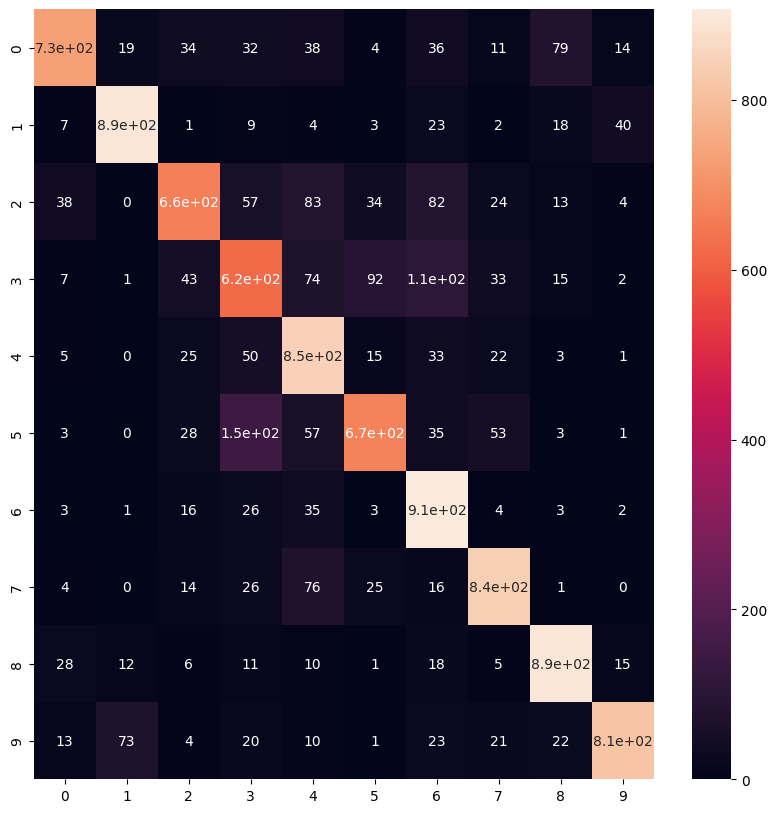

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True)

# 7. Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
  rotation_range = 90,
  width_shift_range = 0.1,
  horizontal_flip = True,
  vertical_flip = True
)

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit(datagen.flow(X_train,y_train,batch_size=32),epochs = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 115ms/step - accuracy: 0.3761 - loss: 1.7842
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 117ms/step - accuracy: 0.4250 - loss: 1.6128
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.4434 - loss: 1.5631
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.4436 - loss: 1.5509
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4596 - loss: 1.5228
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4729 - loss: 1.5040
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4757 - loss: 1.4862
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.4815 - loss: 1.4750
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4897 - loss: 1.4493
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.4956 - loss: 1.4483


In [ ]:
y_test = keras.utils.to_categorical(y_test,n_cat)
eval = cnn_model.evaluate(X_test,y_test)
print(eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.5286 - loss: 1.3150
0.5317999720573425
